# 9.2 Application

Now, let’s apply path modeling to the real-world example. As explained in the introduction, we will investigate the relationships between physical health, functional health, and subjective health, as proposed by Whitelaw and Liang (1991).

We’ve formulated the following hypotheses for our investigation:

1. Physical health influences functional health, which, in turn, predicts subjective health.
2. Physical health directly affects subjective health.

Based on these hypotheses, we structure the relationships into the following diagram:

```{figure} figures/figure_1.png
---
width: 80%
---
```

## Variables

- Physical Health ($X$): The number of illnesses experienced in the last 12 months.
- Functional Health ($Y_1$): The sum score of the SF-36 questionnaire, which measures functional health.
- Subjective Health ($Y_2$): Self-reported subjective health, reflecting how individuals perceive their overall health.

## Loading the data

The data is provided in the book. As in the previous session, we can either load it from the local files (if you downloaded the entire book), or from the GitHub link. We will again use the second version as this would also work in Google Colab:

In [1]:
import pandas as pd
import semopy
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/mibur1/psy111/main/book/statistics/5_Path_Modelling/data/data.txt", sep="\t")
print(df.head())

   1  1.1   0    13  1.2  1.3  1.4
0  1    1   7  15.5  1.0  1.0  1.0
1  1    1   3  19.0  1.0  1.0  1.0
2  1    1   6  20.0  1.0  1.0  1.0
3  1    2  10  20.5  1.0  1.0  1.0
4  1    1   7  22.5  1.0  1.0  1.0


We can see that the columns to not have names, so we assign them based on knowledge we have about the data:

In [2]:
df.columns = ["SubjHealth","SubjHealthChange", "PhysicHealth", "NrDoctorApp", "FunctHealth", "FunctHealth1", "FunctHealth2"]
print(df.head())

   SubjHealth  SubjHealthChange  PhysicHealth  NrDoctorApp  FunctHealth  \
0           1                 1             7         15.5          1.0   
1           1                 1             3         19.0          1.0   
2           1                 1             6         20.0          1.0   
3           1                 2            10         20.5          1.0   
4           1                 1             7         22.5          1.0   

   FunctHealth1  FunctHealth2  
0           1.0           1.0  
1           1.0           1.0  
2           1.0           1.0  
3           1.0           1.0  
4           1.0           1.0  


Great, the DataFrame now looks like it is ready for use! We can continue with defining and fitting the model:

In [3]:
# Define the model
model = semopy.Model("""
                     SubjHealth ~ PhysicHealth + FunctHealth
                     FunctHealth ~ PhysicHealth
                     """)

# Fit the model to our data and estimate parameters
info = model.fit(df)
print(info)

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 0.000
Number of iterations: 14
Params: -0.095 0.876 -0.096 0.172 0.432


We can then inspect the results:

In [4]:
estimates = model.inspect(std_est= True)
print(estimates)

          lval  op          rval  Estimate  Est. Std  Std. Err    z-value  \
0  FunctHealth   ~  PhysicHealth -0.096184 -0.451359  0.004686 -20.527585   
1   SubjHealth   ~  PhysicHealth -0.094898 -0.244325  0.008330 -11.392426   
2   SubjHealth   ~   FunctHealth  0.876182  0.480711  0.039090  22.414663   
3  FunctHealth  ~~   FunctHealth  0.171521  0.796275  0.005977  28.696690   
4   SubjHealth  ~~    SubjHealth  0.431653  0.603198  0.015042  28.696690   

   p-value  
0      0.0  
1      0.0  
2      0.0  
3      0.0  
4      0.0  


This output provides a detailed breakdown of the parameter estimates from the model.

Or the fit statistics:

In [5]:
stats = semopy.calc_stats(model)
print(stats)

       DoF  DoF Baseline      chi2  chi2 p-value  chi2 Baseline       CFI  \
Value    1             4  0.000113      0.991515    1207.802947  1.000831   

       GFI  AGFI  NFI       TLI  RMSEA   AIC        BIC        LogLik  
Value  1.0   1.0  1.0  1.003322      0  10.0  37.033554  6.866405e-08  


Finally, we can also visualise the model:

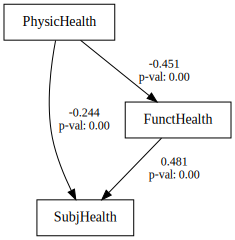

In [6]:
semopy.semplot(model, "figures/health.png", std_ests=True) # plot standardized estimates

**Additional information:** If you want to visualise the model, you need to install Graphviz through pip (if you installed everything in the *requirements.txt* file you already have it). You then also need to install [Graphviz](https://graphviz.org/) as a normal program. On Windows, make sure to select the "Add Graphviz to PATH" option during the installation.


## Model Output

### Objective and Optimization

The first ouput we looked at after defining the model was `info`, which contains general information about the model fit: 

- **Objective Function**: Maximum Likelihood with Weights (MLW).
- **Optimization Algorithm**: Sequential Least Squares Quadratic Programming (SLSQP).
- **Iterations**: The model converged after 14 iterations.
- **Objective Value**: 0.000, indicating no detectable discrepancy between observed and predicted covariance matrices.

### Parameter Estimates

1. `Functional Health ~ Physical Health`
   - Coefficient: **-0.096**, SE: **0.0047**, z: **-20.527**, p: **< 0.001**  
   - **Interpretation**: Physical health (the number of illnesses) has a significant negative effect on functional health. More illnesses reduce functional health.

2. `Subjective Health ~ Physical Health`
   - Coefficient: **-0.094**, SE: **0.008**, z: **-11.39**, p: **< 0.001**  
   - **Interpretation**: Physical health has a significant negative effect on subjective health. More illnesses reduce subjective health.

3. `Subjective Health ~ Functional Health`
   - Coefficient: **0.876**, SE: **0.039**, z: **22.41**, p: **< 0.001**  
   - **Interpretation**: Functional health has a significant positive effect on subjective health. Higher functional health leads to better subjective health.

### Standardized Coefficients

Standardized coefficients (`Est.Std`) allow us to compare the relative influence of each predictor. They can be interpreted similarly to correlation coefficients, indicating the strength and direction of relationships on a standardized scale. However, unlike correlations, they reflect causal relationships within the model's structure and account for both direct and indirect effects.

- **Physical Health → Functional Health**: **-0.451** (strong negative effect).  
- **Physical Health → Subjective Health**: **-0.244** (moderate negative effect).  
- **Functional Health → Subjective Health**: **0.481** (strong positive effect).

### Variances

1. `Functional Health ~~ Functional Health`: Residual variance = **0.172** (p < 0.001). This represents the unexplained variance in functional health.
   - Coefficient: **0.172**, standardized coefficient: **0.796**  
   - **Interpretation**: The standardized **Residual Variance** indicates that approximately **80%** of the individual variance in functional health remains unexplained by the model.
2. `Subjective Health ~~ Subjective Health`: Residual variance = **0.432** (p < 0.001). This represents the unexplained variance in subjective health.
   - Coefficient: **0.432**, standardized coefficient: **0.603**  
   - **Interpretation**: In this case, the standardized **Residual Variance** indicates that approximately **60%** of the individual variance in subjective health remains unexplained by the model.


## Model Evaluation

### Fit Metrics

- **Chi-Square**: **0.0001** (p = **0.9915**), excellent fit.  
- **CFI**: **1.0008**, **TLI**: **1.0033** (indicative of possible overfit).  
- **RMSEA**: **0**, **GFI/AGFI**: **1.0**, perfect fit.  
- **AIC**: **10**, useful for model comparison.

### Overfitting Concerns

- High fit indices and low Chi-Square suggest potential overfitting.  
- **Recommendation**: Test on an independent dataset or simplify the model.


## Interpretation

### Key Insights

1. `Functional Health ~ Physical Health`: Negative relationship; more illnesses (measured as higher score in physical health) lead to reduced functional health.
2. `Subjective Health ~ Physical Health`: Negative relationship; more illnesses lead to poorer subjective health.
3. `Subjective Health ~ Functional Health`: Positive relationship; higher functional health improves subjective health.

### Implications

- **Mediation**: Functional health mediates the effect of physical health on subjective health. In other words, apart from directly influencing subjective health, physical health also influences subjective health by influencing functional health (indirect effect).
- **Variance Explained**: Functional health (20.6%), subjective health (39.7%). Other factors likely influence outcomes.  These percentages represent **R-squared** values (explained variance) and are calculated as 1 minus the standardized residual variance.

### Limitations

- **Overfitting**: Model fit metrics suggest overfitting risks.  
- **Self-reported Measures**: Subjective health may suffer from biases (e.g., recall bias).  
- **Large Unexplained Variance**: Additional predictors (e.g., social factors) could enhance the model.


```{admonition} Caution
:class: warning
While the model demonstrates significant and meaningful relationships, the almost perfect fit (e.g., Chi-Square value close to zero, p-value very high, and objective value of 0.000) raises a valid question: **Is the model overfitting?**

- Overfitting could mean that the model may not generalize well to other datasets.
- To address this, consider testing the model on a different dataset or simplifying it to ensure robustness.
```